<a href="https://colab.research.google.com/github/axjing/naiveGPT-A/blob/main/gpt_nbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building a GPT

Companion notebook to the [Zero To Hero](https://karpathy.ai/zero-to-hero.html) video on GPT.

In [ ]:
# https://colab.research.google.com/drive/1EIDeyZPupgI3HQJ2MMz5uBf7A5OoNdUN#scrollTo=0MAokA76STZT
# We always start with a dataset to train on. Let's download the tiny shakespeare dataset
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2025-03-08 14:42:26--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt.2’

input.txt.2         100%[===================>]   1.06M  --.-KB/s    in 0.008s  

2025-03-08 14:42:26 (132 MB/s) - ‘input.txt.2’ saved [1115394/1115394]



In [ ]:
# read it in to inspect it
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [ ]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  1115394


In [ ]:
# let's look at the first 1000 characters
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [ ]:
len(set(text))

65

In [ ]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [ ]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

s="hii there"
print(len(s))
print(encode(s),len(encode(s)))
print(decode(encode("hii there")))

9
[46, 47, 47, 1, 58, 46, 43, 56, 43] 9
hii there


In [ ]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch # we use PyTorch: https://pytorch.org
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:10]) # the 1000 characters we looked at earier will to the GPT look like this


import torch.nn as nn
emb1=nn.Embedding(vocab_size,64) # vocab_size nembed
emb1.weight.shape
em_data=emb1(data)
print(em_data.shape)
print(data[0])
print(em_data[0],em_data[0].shape)

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47])
torch.Size([1115394, 64])
tensor(18)
tensor([ 4.0864e-01, -1.2987e+00,  1.0930e+00, -5.1575e-01, -4.8376e-01,
         2.8944e-01, -1.0690e-01,  2.0984e+00,  9.7552e-01, -8.4193e-01,
        -2.4529e-02,  8.8187e-01, -7.0549e-02,  1.6674e+00, -1.4112e+00,
         2.8545e+00, -6.1392e-01, -7.8699e-01,  5.6418e-02,  1.7637e-03,
        -3.1698e-01, -1.1864e+00, -4.6118e-01,  1.5097e+00, -2.7998e-01,
         3.3093e-01,  5.3553e-01,  4.8357e-01, -1.5252e+00,  3.4221e-01,
        -1.0428e+00, -1.2098e-01, -2.3640e-02, -6.4670e-01,  3.3914e-01,
         7.5612e-01, -8.6621e-01,  2.9998e-01,  2.5767e-01,  1.3628e+00,
        -9.2968e-01, -5.4983e-01, -9.3632e-01,  1.2795e-01,  1.2174e+00,
        -1.6732e+00, -1.6424e+00, -1.2453e-01,  6.4405e-01,  5.4531e-01,
        -1.8488e-01,  1.2253e-01, -9.8841e-01,  7.7062e-01, -3.6584e-02,
         3.5684e-01, -3.8302e-01, -9.5906e-01, -1.1341e-01, -1.1397e+00,
    

In [ ]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [ ]:
block_size = 8
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [ ]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


In [ ]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    # print(len(data)-block_size)
    ix = torch.randint(len(data) - block_size, (batch_size,))
    # print(ix.size())
    x = torch.stack([data[i:i+block_size] for i in ix])
    # print(x.shape)
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when input is [24] the target: 43
when input is [24, 43] the target: 58
when input is [24, 43, 58] the target: 5
when input is [24, 43, 58, 5] the target: 57
when input is [24, 43, 58, 5, 57] the target: 1
when input is [24, 43, 58, 5, 57, 1] the target: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target: 39
when input is [44] the target: 53
when input is [44, 53] the target: 56
when input is [44, 53, 56] the target: 1
when input is [44, 53, 56, 1] the target: 58
when input is [44, 53, 56, 1, 58] the target: 46
when input is [44, 53

In [ ]:
print(xb) # our input to the transformer

tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])


In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)

print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))


torch.Size([32, 65])
tensor(4.8786, grad_fn=<NllLossBackward0>)

Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


In [ ]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [ ]:
batch_size = 32
for steps in range(100): # increase number of steps for good results...

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())


4.587916374206543


In [ ]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))


xiKi-RJ:CgqVuUa!U?qMH.uk!sCuMXvv!CJFfx;LgRyJknOEti.?I&-gPlLyulId?XlaInQ'q,lT$
3Q&sGlvHQ?mqSq-eON
x?SP fUAfCAuCX:bOlgiRQWN:Mphaw
tRLKuYXEaAXxrcq-gCUzeh3w!AcyaylgYWjmJM?Uzw:inaY,:C&OECW:vmGGJAn3onAuMgia!ms$Vb q-gCOcPcUhOnxJGUGSPJWT:.?ujmJFoiNL&A'DxY,prZ?qdT;hoo'dHooXXlxf'WkHK&u3Q?rqUi.kz;?Yx?C&u3Qbfzxlyh'Vl:zyxjKXgC?
lv'QKFiBeviNxO'm!Upm$srm&TqViqiBD3HBP!juEOpmZJyF$Fwfy!PlvWPFC
&WDdP!Ko,px
x
tREOE;AJ.BeXkylOVD3KHp$e?nD,.SFbWWI'ubcL!q-tU;aXmJ&uGXHxJXI&Z!gHRpajj;l.
pTErIBjx;JKIgoCnLGXrJSP!AU-AcbczR?


## The mathematical trick in self-attention

In [ ]:
# toy example illustrating how matrix multiplication can be used for a "weighted aggregation"
torch.manual_seed(42)
a = torch.tril(torch.ones(3, 3))
print(a)
print(a.shape)
a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0,10,(3,2)).float()
c = a @ b
print('a=')
print(a)
print('--')
print('b=')
print(b)
print('--')
print('c=')
print(c)

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])
torch.Size([3, 3])
a=
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
--
b=
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
--
c=
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


In [ ]:
# consider the following toy example:

torch.manual_seed(1337)
B,T,C = 4,8,2 # batch, time, channels
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [ ]:
# We want x[b,t] = mean_{i<=t} x[b,i]
xbow = torch.zeros((B,T,C))
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1] # (t,C)
        xbow[b,t] = torch.mean(xprev, 0)


In [ ]:
# version 2: using matrix multiply for a weighted aggregation
wei = torch.tril(torch.ones(T, T))
wei = wei / wei.sum(1, keepdim=True)
xbow2 = wei @ x # (B, T, T) @ (B, T, C) ----> (B, T, C)
torch.allclose(xbow, xbow2)

False

In [ ]:
# version 3: use Softmax
tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)
xbow3 = wei @ x
torch.allclose(xbow, xbow3)


False

In [ ]:
# version 4: self-attention!
torch.manual_seed(1337)
B,T,C = 4,8,32 # batch, time, channels
x = torch.randn(B,T,C)

# let's see a single Head perform self-attention
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x)   # (B, T, 16)
q = query(x) # (B, T, 16)
wei =  q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) ---> (B, T, T)

tril = torch.tril(torch.ones(T, T))
#wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)

v = value(x)
out = wei @ v
#out = wei @ x

out.shape

torch.Size([4, 8, 16])

In [ ]:
wei[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
        [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
        [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
        [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
       grad_fn=<SelectBackward0>)

In [ ]:
k = torch.randn(B,T,head_size)
q = torch.randn(B,T,head_size)
wei = q @ k.transpose(-2, -1) * head_size**-0.5

In [ ]:
k.var()

tensor(1.0449)

In [ ]:
q.var()

tensor(1.0700)

In [ ]:
wei.var()

tensor(1.0918)

In [ ]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5]), dim=-1)

tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])

In [ ]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])*8, dim=-1) # gets too peaky, converges to one-hot

tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])

In [ ]:
class LayerNorm1d: # (used to be BatchNorm1d)

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)

  def __call__(self, x):
    # calculate the forward pass
    xmean = x.mean(1, keepdim=True) # batch mean
    xvar = x.var(1, keepdim=True) # batch variance
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

torch.manual_seed(1337)
module = LayerNorm1d(100)
x = torch.randn(32, 100) # batch size 32 of 100-dimensional vectors
x = module(x)
x.shape

torch.Size([32, 100])

In [ ]:
x[:,0].mean(), x[:,0].std() # mean,std of one feature across all batch inputs

(tensor(0.1469), tensor(0.8803))

In [ ]:
x[0,:].mean(), x[0,:].std() # mean,std of a single input from the batch, of its features

(tensor(-9.5367e-09), tensor(1.0000))

In [ ]:
# French to English translation example:

# <--------- ENCODE ------------------><--------------- DECODE ----------------->
# les réseaux de neurones sont géniaux! <START> neural networks are awesome!<END>



### Full finished code, for reference

You may want to refer directly to the git repo instead though.

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0
# ------------

torch.manual_seed(1337)

# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    # print(ix.shape)
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    # print(x.shape,y.shape)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        # print(f"input:{idx},\n{idx.shape}")
        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        # print(tok_emb.shape)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
            # print("generate:",idx.shape)
        return idx

model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(context)
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))


In [ ]:
# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(context)
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))

tensor([[0]])

And thou tougesome the aways I dot?
Now, grave to becaunfor with dightnerious givent, I but his gon,
Suse, didrences wife; her
take the not
Rayth have all malter-dry me yough:
What Have shee.

SICINIUS:
Is am thire;
Nor a doth that make tread steed;
Pirdied Desumph, now betwered's prettedy.
Senst you not, to this fawn urtwon
A beor her the my pactated with his fourtuny,
Far is no his sut, you:--hont mandever's in
grean mack.

OXFORD:
Your amnother Frield, whinds
were his groy, now you read of tomm-hon-before hold,
But cove pleasty of my his
will se to his Gom
Wears is thurgets gives there's up?
I would loves minost.

BOWNIRD:
Some.
Where you nock: so,
Cave, my what a lasting that man to teetens
To his much of so you
was facentiong to you mine, and pent;
Nor should since the vollation in in by his quirt.
If Havanged, way his bomise.

CORIOLANA:
Nor hear your and-druph
Behalt but you feld was that resding is is these lost;
And sh, I hortain, I shou'll greart forge.
not Plo

# 新的开始



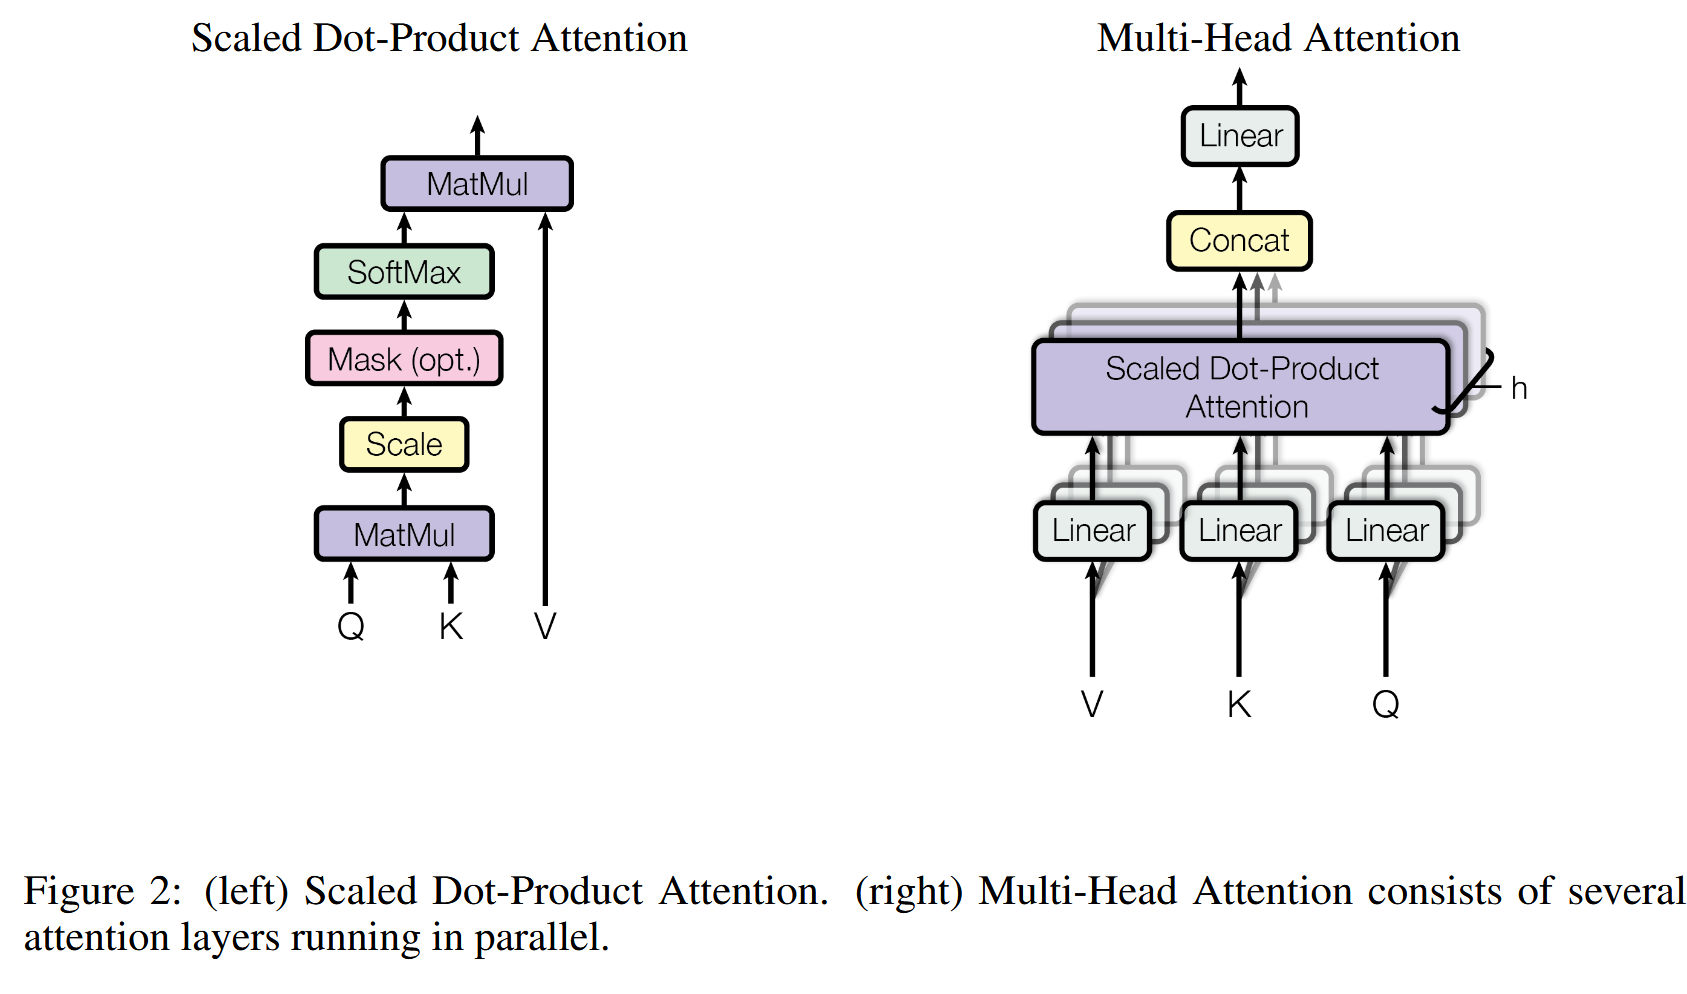

$$
Attention(Q,K,V)=softmax(\frac{QK^T}{\sqrt{d_k}})V
$$

Notes：
- Attention是一种**通信机制**。可以看作是有向图中的节点彼此观察，并通过来自所有指向它们的节点的加权和来聚合信息，且权重是与数据相关的。
- 这里没有空间的概念。Attention仅仅作用于一组向量上。这就是为什么我们需要对词元进行位置编码。
- 当然，批处理维度中的每个示例都是完全独立处理的，彼此之间不会有任何“交互”。
- 在“encoder”Attention block中，只需删除使用 `tril` 进行mask处理的那一行代码，这样就允许所有词元进行通信。这里的这个模块被称为“encoder”attention block，因为它采用了三角掩码，并且通常用于自回归设置中，比如语言建模。
- “self-attention”仅仅意味着key和value与query来自相同的源(输入)。在“cross-attenion”中，query仍然由 x 生成，但key和value来自其他的外部源（例如，一个encode module）。
- “scaled”attention还会将 `wei` 除以 1/sqrt(head_size)。这样一来，当输入的 Q、K 具有单位方差时，`wei` 也会具有单位方差，并且 Softmax 函数的输出会保持分散，不会过度饱和。如下所示。

In [2]:
# https://colab.research.google.com/drive/1EIDeyZPupgI3HQJ2MMz5uBf7A5OoNdUN#scrollTo=0MAokA76STZT
# We always start with a dataset to train on. Let's download the tiny shakespeare dataset
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2025-03-11 14:30:34--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.04s   

2025-03-11 14:30:34 (27.8 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [9]:

# read it in to inspect it
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()
print("length of dataset in characters: ", len(text))
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
batch_size=16
n_embd: int = 32
head_size:int= 64
seq_length=20
print(''.join(chars))
print(f"vocab_size:{vocab_size}")

# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }




def encode_char(chars):
  idxs=[]
  for c in chars:
    idx=stoi[c]
    idxs.append(idx)
  return idxs
def decode_char_idx(idxs):
  s=""
  for i in idxs:
    s+=itos[i]
  return s

encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

s="hii there"
print(len(s))
print(encode(s),len(encode(s)))
print(decode(encode("hii there")))
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch # we use PyTorch: https://pytorch.org
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
class CausalSelfAttention(nn.Module):
  def __init__(self,n_embed,head_size,seq_len,dropout=0.):
    super().__init__()
    self.q=nn.Linear(n_embed,head_size)
    self.k=nn.Linear(n_embed,head_size)
    self.v=nn.Linear(n_embed,head_size)

    self.register_buffer("tril",torch.tril(torch.ones(seq_len,seq_len)))
    self.dropout=nn.Dropout(dropout)
  def forward(self,x):
    B,T,C=x.shape #
    q=self.q(x) # B,T,head_size
    k=self.k(x) # B,T,head_size
    v=self.v(x) # B,T,head_size

    # 计算 acctention scores
    att=q@k.transpose(-2,-1)*(1/torch.sqrt(torch.tensor(k.size(-1)))) #(B,T,head_size)@(B,head_size,T)=(B,T,T)
    att=att.masked_fill(self.tril[:T,:T]==0,float('-inf')) # (B,T,T)
    att=nn.functional.softmax(att,dim=-1) # (B,T,T)
    att=self.dropout(att)

    out=att@v #(B,T,T)@(B,T,head_size)=(B,T,head_size)

    return out


def get_batch(data,seq_length,batch_size,device):

  index_x=torch.randint(len(data)-seq_length,(batch_size,))
  print(f"index_x:{index_x.shape},{index_x}")

  x=torch.stack([data[i:i+seq_length] for i in index_x])
  y=torch.stack([data[i+1:i+seq_length+1] for i in index_x])

  # x,y=x.to(device),y.to(device)
  return x,y






data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:10]) # the 1000 characters we looked at earier will to the GPT look like this



emb1=nn.Embedding(vocab_size,n_embd) # vocab_size nembed
# emb1=emb1.to(device)
emb1.weight.shape
em_data=emb1(data)
print(em_data.shape)
print(data[0])
print(em_data[0],em_data[0].shape)

x,y=get_batch(data,seq_length,batch_size,device)
print(x.size(),y.size())
ex=emb1(x)
attent=CausalSelfAttention(n_embd,head_size,seq_length)
emb1_x=attent(ex)
print(emb1_x.shape)


length of dataset in characters:  1115394

 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
vocab_size:65
9
[46, 47, 47, 1, 58, 46, 43, 56, 43] 9
hii there
torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47])
torch.Size([1115394, 32])
tensor(18)
tensor([ 0.1263,  0.6762, -0.5532,  0.8301, -0.3605, -0.3595, -1.0900,  0.8885,
         0.8887,  0.8470,  0.8669, -1.8409, -1.2781, -1.2868, -0.1621, -1.5081,
        -0.3848,  0.0765,  0.6817, -0.0286,  0.3916, -0.1285, -1.6687, -0.8882,
        -0.5603, -0.1376,  1.1085,  1.5932, -0.9877,  1.0170,  0.0832,  0.0864],
       grad_fn=<SelectBackward0>) torch.Size([32])
index_x:torch.Size([16]),tensor([ 239023,  748717,  142843,  227012,  224544,  930959,  432780,  708959,
        1026454,  153337, 1034789,   40787,  144495,  474658,  530548,  994866])
torch.Size([16, 20]) torch.Size([16, 20])
torch.Size([16, 20, 64])


In [ ]:
s="hello,word!"
en1=encode(s)
en2=encode_char(s)
print(f"encode1:{en1}")
print(f"encode2:{en2}")

print(decode(en1))
print(decode_char_idx(en2))

t1=torch.ones(12,12)
t2=torch.tril(t1)
print(t1)
print(t2)

encode1:[46, 43, 50, 50, 53, 6, 61, 53, 56, 42, 2]
encode2:[46, 43, 50, 50, 53, 6, 61, 53, 56, 42, 2]
hello,word!
hello,word!
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
   

## GPT2 model

In [ ]:
"""
Full definition of a GPT Language Model, all of it in this single file.
References:
1) the official GPT-2 TensorFlow implementation released by OpenAI:
https://github.com/openai/gpt-2/blob/master/src/model.py
2) huggingface/transformers PyTorch implementation:
https://github.com/huggingface/transformers/blob/main/src/transformers/models/gpt2/modeling_gpt2.py
"""

import inspect
import math
from dataclasses import dataclass

import torch
import torch.nn as nn
from torch.nn import functional as F


@dataclass
class GPTConfig:
    block_size: int = 1024
    vocab_size: int = 50304 # GPT-2 vocab_size of 50257, padded up to nearest multiple of 64 for efficiency
    n_layer: int = 12
    n_head: int = 12
    n_embd: int = 768
    dropout: float = 0.0
    bias: bool = True # True: bias in Linears and LayerNorms, like GPT-2. False: a bit better and faster

class LayerNorm(nn.Module):
    """ LayerNorm but with an optional bias. PyTorch doesn't support simply bias=False """

    def __init__(self, ndim, bias):
        super().__init__()
        self.weight = nn.Parameter(torch.ones(ndim))
        self.bias = nn.Parameter(torch.zeros(ndim)) if bias else None

    def forward(self, input):
        return F.layer_norm(input, self.weight.shape, self.weight, self.bias, 1e-5)

class CausalSelfAttention(nn.Module):

    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0
        # 在batch中的所有head的key, query, value projections
        self.c_attn = nn.Linear(config.n_embd, 3 * config.n_embd, bias=config.bias)
        # output projection
        self.c_proj = nn.Linear(config.n_embd, config.n_embd, bias=config.bias)
        # regularization
        self.attn_dropout = nn.Dropout(config.dropout)
        self.resid_dropout = nn.Dropout(config.dropout)
        self.n_head = config.n_head
        self.n_embd = config.n_embd
        self.dropout = config.dropout
        # flash attention 使GPU变得快，但支持仅在PyTorch>=2.0中
        self.flash = hasattr(torch.nn.functional, 'scaled_dot_product_attention')
        if not self.flash:
            print("WARNING: using slow attention. Flash Attention requires PyTorch >= 2.0")
            # causal mask 以确保attention仅应用于输入序列中的左侧
            self.register_buffer("bias", torch.tril(torch.ones(config.block_size, config.block_size))
                                        .view(1, 1, config.block_size, config.block_size))

    def forward(self, x):
        B, T, C = x.size() # batch size, sequence length, embedding dimensionality (n_embd)

        # 计算所有head的q,k,v，并且交换sequence和h_head的dim # TODO: check this
        q, k, v  = self.c_attn(x).split(self.n_embd, dim=2)
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)

        # causal self-attention; Self-attend: (B, nh, T, hs) x (B, nh, hs, T) -> (B, nh, T, T)
        if self.flash:
            # efficient attention using Flash Attention CUDA kernels
            y = torch.nn.functional.scaled_dot_product_attention(q, k, v, attn_mask=None, dropout_p=self.dropout if self.training else 0, is_causal=True)
        else:
            # 手动实现attention
            att = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(k.size(-1)))
            att = att.masked_fill(self.bias[:,:,:T,:T] == 0, float('-inf'))
            att = F.softmax(att, dim=-1)
            att = self.attn_dropout(att)
            y = att @ v # (B, nh, T, T) x (B, nh, T, hs) -> (B, nh, T, hs)
        y = y.transpose(1, 2).contiguous().view(B, T, C) # re-assemble all head outputs side by side

        # output projection
        y = self.resid_dropout(self.c_proj(y))
        return y

class MLP(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.c_fc    = nn.Linear(config.n_embd, 4 * config.n_embd, bias=config.bias)
        self.gelu    = nn.GELU()
        self.c_proj  = nn.Linear(4 * config.n_embd, config.n_embd, bias=config.bias)
        self.dropout = nn.Dropout(config.dropout)

    def forward(self, x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        x = self.dropout(x)
        return x

class Block(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.ln_1 = LayerNorm(config.n_embd, bias=config.bias)
        self.attn = CausalSelfAttention(config)
        self.ln_2 = LayerNorm(config.n_embd, bias=config.bias)
        self.mlp = MLP(config)

    def forward(self, x):
        x = x + self.attn(self.ln_1(x))
        x = x + self.mlp(self.ln_2(x))
        return x


class GPT(nn.Module):

    def __init__(self, config):
        super().__init__()
        assert config.vocab_size is not None
        assert config.block_size is not None
        self.config = config

        self.transformer = nn.ModuleDict(dict(
            wte = nn.Embedding(config.vocab_size, config.n_embd),
            wpe = nn.Embedding(config.block_size, config.n_embd),
            drop = nn.Dropout(config.dropout),
            h = nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
            ln_f = LayerNorm(config.n_embd, bias=config.bias),
        ))
        self.lm_head = nn.Linear(config.n_embd, config.vocab_size, bias=False)
        # 使用torch.compile()时权重绑定会生成一些警告：
        # "用户警告：functional_call传递了多个绑定权重值。
        # 此行为已弃用，将在未来版本中成为错误”
        # 不能100%确定这是什么，到目前为止似乎是无害的。TODO 调查
        self.transformer.wte.weight = self.lm_head.weight # https://paperswithcode.com/method/weight-tying

        # init all weights
        self.apply(self._init_weights)
        # 根据GPT-2论文，将特殊缩放的初始化应用于residual projections
        for pn, p in self.named_parameters():
            if pn.endswith('c_proj.weight'):
                torch.nn.init.normal_(p, mean=0.0, std=0.02/math.sqrt(2 * config.n_layer))

        # report number of parameters
        print("number of parameters: %.2fM" % (self.get_num_params()/1e6,))

    def get_num_params(self, non_embedding=True):
        """
        返回模型中的参数量
        对于非嵌入计数（默认），减去位置嵌入。
        token embedding 也是如此，除非参数共享这些
        params实际上用作最后一层的权重，因此我们包含它们。
        """
        n_params = sum(p.numel() for p in self.parameters())
        if non_embedding:
            n_params -= self.transformer.wpe.weight.numel()
        return n_params

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        device = idx.device
        b, t = idx.size()
        assert t <= self.config.block_size, f"Cannot forward sequence of length {t}, block size is only {self.config.block_size}"
        pos = torch.arange(0, t, dtype=torch.long, device=device) # shape (t)

        # forward the GPT model itself
        tok_emb = self.transformer.wte(idx) # token embeddings of shape (b, t, n_embd)
        pos_emb = self.transformer.wpe(pos) # position embeddings of shape (t, n_embd)
        x = self.transformer.drop(tok_emb + pos_emb)
        for block in self.transformer.h:
            x = block(x)
        x = self.transformer.ln_f(x)

        if targets is not None:
            # targets 存在时，计算loss
            logits = self.lm_head(x)
            loss = F.cross_entropy(logits.view(-1, logits.size(-1)), targets.view(-1), ignore_index=-1)
        else:
            # inference-time mini-optimization: 仅在最后一个位置lm_head
            logits = self.lm_head(x[:, [-1], :]) # note: using list [-1] to preserve the time dim
            loss = None

        return logits, loss

    def crop_block_size(self, block_size):
        # 必要时可以减少模型的block size。例如，我们可能会加载 GPT - 2 预训练模型的检查点（block size=1024），但对于一些规模更小、更简单的模型，我们希望使用更小的块大小。
        assert block_size <= self.config.block_size
        self.config.block_size = block_size
        self.transformer.wpe.weight = nn.Parameter(self.transformer.wpe.weight[:block_size])
        for block in self.transformer.h:
            if hasattr(block.attn, 'bias'):
                block.attn.bias = block.attn.bias[:,:,:block_size,:block_size]

    @classmethod
    def from_pretrained(cls, model_type, override_args=None):
        assert model_type in {'gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-xl'}
        override_args = override_args or {} # default to empty dict
        # 只有dropout可以被覆盖，请参阅下面的更多注释
        assert all(k == 'dropout' for k in override_args)
        from transformers import GPT2LMHeadModel
        print("loading weights from pretrained gpt: %s" % model_type)

        # n_layer, n_head and n_embd 由 mode_type 确定
        config_args = {
            'gpt2':         dict(n_layer=12, n_head=12, n_embd=768),  # 124M params
            'gpt2-medium':  dict(n_layer=24, n_head=16, n_embd=1024), # 350M params
            'gpt2-large':   dict(n_layer=36, n_head=20, n_embd=1280), # 774M params
            'gpt2-xl':      dict(n_layer=48, n_head=25, n_embd=1600), # 1558M params
        }[model_type]
        print("forcing vocab_size=50257, block_size=1024, bias=True")
        config_args['vocab_size'] = 50257 # always 50257 for GPT model checkpoints
        config_args['block_size'] = 1024 # always 1024 for GPT model checkpoints
        config_args['bias'] = True # always True for GPT model checkpoints
        # 如果需要，我们可以覆盖dropout rate
        if 'dropout' in override_args:
            print(f"overriding dropout rate to {override_args['dropout']}")
            config_args['dropout'] = override_args['dropout']
        # 创建并从头开始初始化miniGPT模型
        config = GPTConfig(**config_args)
        model = GPT(config)
        sd = model.state_dict()
        sd_keys = sd.keys()
        sd_keys = [k for k in sd_keys if not k.endswith('.attn.bias')] # discard this mask / buffer, not a param

        # init a huggingface/transformers model
        model_hf = GPT2LMHeadModel.from_pretrained(model_type)
        sd_hf = model_hf.state_dict()

        # 复制同时确保所有参数在名称和形状上对齐和匹配
        sd_keys_hf = sd_hf.keys()
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.masked_bias')] # 丢弃此buffer
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.bias')] # 丢弃此mask / buffer
        transposed = ['attn.c_attn.weight', 'attn.c_proj.weight', 'mlp.c_fc.weight', 'mlp.c_proj.weight']
        #  OpenAI 的checkpoints使用了一个 “Conv1D”（一维卷积）模块，但我们只想使用一个普通的线性（Linear）层。这意味着在导入这些权重时，必须对这些权重进行转置操作
        assert len(sd_keys_hf) == len(sd_keys), f"mismatched keys: {len(sd_keys_hf)} != {len(sd_keys)}"
        for k in sd_keys_hf:
            if any(k.endswith(w) for w in transposed):
                # 转置的Conv1D权重的特殊处理
                assert sd_hf[k].shape[::-1] == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k].t())
            else:
                # 正常复制其他所有参数other parameters
                assert sd_hf[k].shape == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k])

        return model

    def configure_optimizers(self, weight_decay, learning_rate, betas, device_type):
        # 从所有候选参数开始
        param_dict = {pn: p for pn, p in self.named_parameters()}
        # 过滤掉那些不需要梯度的参数
        param_dict = {pn: p for pn, p in param_dict.items() if p.requires_grad}
        # 创建optim组，任何2D参数都将被权重衰减
        # 即 matmuls + embeddings中的所有权重张量都会衰减，所有biases and layernorms都不会。
        decay_params = [p for n, p in param_dict.items() if p.dim() >= 2]
        nodecay_params = [p for n, p in param_dict.items() if p.dim() < 2]
        optim_groups = [
            {'params': decay_params, 'weight_decay': weight_decay},
            {'params': nodecay_params, 'weight_decay': 0.0}
        ]
        num_decay_params = sum(p.numel() for p in decay_params)
        num_nodecay_params = sum(p.numel() for p in nodecay_params)
        print(f"num decayed parameter tensors: {len(decay_params)}, with {num_decay_params:,} parameters")
        print(f"num non-decayed parameter tensors: {len(nodecay_params)}, with {num_nodecay_params:,} parameters")
        #创建AdamW优化器并使用融合版本（如果可用）
        fused_available = 'fused' in inspect.signature(torch.optim.AdamW).parameters
        use_fused = fused_available and device_type == 'cuda'
        extra_args = dict(fused=True) if use_fused else dict()
        optimizer = torch.optim.AdamW(optim_groups, lr=learning_rate, betas=betas, **extra_args)
        print(f"using fused AdamW: {use_fused}")

        return optimizer

    def estimate_mfu(self, fwdbwd_per_iter, dt):
        """ estimate model flops utilization (MFU) in units of A100 bfloat16 peak FLOPS """
        # first estimate the number of flops we do per iteration.
        # see PaLM paper Appendix B as ref: https://arxiv.org/abs/2204.02311
        N = self.get_num_params()
        cfg = self.config
        L, H, Q, T = cfg.n_layer, cfg.n_head, cfg.n_embd//cfg.n_head, cfg.block_size
        flops_per_token = 6*N + 12*L*H*Q*T
        flops_per_fwdbwd = flops_per_token * T
        flops_per_iter = flops_per_fwdbwd * fwdbwd_per_iter
        # 将触发器吞吐量表示为A100 bfloat16峰值触发器的比率
        flops_achieved = flops_per_iter * (1.0/dt) # per second
        flops_promised = 312e12 # A100 GPU bfloat16峰值翻转为312 TFLOPS
        mfu = flops_achieved / flops_promised
        return mfu

    @torch.no_grad()
    def generate(self, idx, max_new_tokens, temperature=1.0, top_k=None):
        """
        取索引idx(LongTensor of shape (b,t))的条件序列并完成
        序列max_new_tokens次，每次都将预测反馈到模型中。
        最好确保处于model.eval()操作模式。
        """
        for _ in range(max_new_tokens):
            # 如果序列的上下文长度超过block_size，裁剪到block_size
            idx_cond = idx if idx.size(1) <= self.config.block_size else idx[:, -self.config.block_size:]
            # 前向传播idx_cond以获取logits
            logits, _ = self(idx_cond)
            ## 在最后一步提取logits并按所需temperature缩放
            logits = logits[:, -1, :] / temperature
            #  可选择将logits裁剪为仅top k个选项
            if top_k is not None:
                v, _ = torch.topk(logits, min(top_k, logits.size(-1)))
                logits[logits < v[:, [-1]]] = -float('Inf')
            # 应用softmax将logits转换为（标准化）概率
            probs = F.softmax(logits, dim=-1)
            # 从概率分布中采样下一个token
            idx_next = torch.multinomial(probs, num_samples=1)
            # 将采样索引附加到运行序列并继续
            idx = torch.cat((idx, idx_next), dim=1)

        return idx

## 准备数据

In [ ]:

torch.manual_seed(1337)

!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]
print(f"train has {len(train_data)} tokens")
print(f"val has {len(val_data)},tokens")
# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

--2025-03-02 08:30:08--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.05s   

2025-03-02 08:30:08 (22.1 MB/s) - ‘input.txt’ saved [1115394/1115394]

train has 1003854 tokens
val has 111540,tokens


## 设置超参数

In [ ]:
# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64 # 768 #64
n_head = 4 # 12 #4
n_layer = 4 # 12 #4
dropout = 0.0
model_config=GPTConfig(block_size=block_size,vocab_size=vocab_size,n_layer=n_layer,n_head=n_head,n_embd=n_embd,dropout=dropout)

## 训练

In [ ]:

@torch.no_grad()
def estimate_loss():
    out = {}
    model_gpt.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model_gpt(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model_gpt.train()
    return out

model_gpt = GPT(config=model_config) #TODO
m_gpt = model_gpt.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m_gpt.parameters())/1e6, 'M parameters')
weight_decay = 1e-1
beta1 = 0.9
beta2 = 0.95
grad_clip = 1.0 # clip gradients at this value, or disable if == 0.0
# create a PyTorch optimizer
# optimizer = torch.optim.AdamW(model_gpt.parameters(), lr=learning_rate, betas=(beta1, beta2), eps=1e-08, weight_decay=weight_decay, amsgrad=False)
optimizer = torch.optim.AdamW(model_gpt.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model_gpt(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()



In [ ]:
# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(context)
print(decode(m_gpt.generate(context, max_new_tokens=2000)[0].tolist()))


tensor([[0]])

A peak are
that Aack-vistion's callo?

Stand:
Fiet Romerutio, I sis it Quich claugh,
And my dister, feellous chepigh roune the be,
The genternet not me. But love, as truchar you proved usen
Rescences to offfes Lace thou shall:
I woulk prom 'Teal a peop ime.


KING RICHAM:
No ame, honour on:-fall lese of your like you
fly, leave off you to greads
dead thy suir of by with offect slave dooth, I know yburate thou have asuie,
The crease high as as gurmic Do.
Whose have gatior too, How daint is of his frange,-- for Jepilie
t; thou kingure now be I comemed
Boy toud, crechinged the man thror,
That's Knouch'd flightealy they ushoot
To seak gent quty? I marchare, ands; if look, at my live
Duke to my come
My know and he somy wors reform as banishy
LooDe that to good; o as arriden,
That you be of sity fleit Andor, took, looks,
For, firniched my his beguiver enast.
Os noblived accust of his for
Are would of as sated
I thest be of my sport; when what
The rest thou prace brieter to--



# Exp

In [ ]:
import torch
import torch.nn.functional as F

# 示例输入
logits = torch.tensor([2.0, 1.0, 0.1])

# 使用Sigmoid函数
sigmoid_output = torch.sigmoid(logits)
print("Sigmoid输出:", sigmoid_output)
print("Sigmoid输出之和:", sigmoid_output.sum().item())

# 使用Softmax函数
softmax_output = F.softmax(logits, dim=0)
print("Softmax输出:", softmax_output)
print("Softmax输出之和:", softmax_output.sum().item())

Sigmoid输出: tensor([0.8808, 0.7311, 0.5250])
Sigmoid输出之和: 2.1368348598480225
Softmax输出: tensor([0.6590, 0.2424, 0.0986])
Softmax输出之和: 1.0000001192092896


## 解析torch.multinomial
https://pytorch.org/docs/stable/generated/torch.multinomial.html
`torch.multinomial` 是 PyTorch 库中的一个函数，用于从多项分布中进行抽样。多项分布是一种离散概率分布，它描述了在多次独立试验中，每个可能结果出现的次数的概率分布。torch.multinomial 函数可以根据给定的概率分布，随机抽取指定数量的样本。

`torch.multinomial` 是 PyTorch 库中的一个函数，用于从多项分布中进行抽样。多项分布是一种离散概率分布，它描述了在多次独立试验中，每个可能结果出现的次数的概率分布。`torch.multinomial` 函数可以根据给定的概率分布，随机抽取指定数量的样本。

### 函数签名
```python
torch.multinomial(input, num_samples, replacement=False, out=None, generator=None)
```

### 参数解释
- **input**：输入的一维张量，表示每个类别的概率分布。这个张量中的所有元素必须是非负的，并且至少有一个元素是正的。
- **num_samples**：要抽取的样本数量，必须是一个正整数。
- **replacement**：一个布尔值，指示是否允许重复抽样。如果设置为 `True`，则可以多次抽取同一个元素；如果设置为 `False`，则每个元素最多只能被抽取一次。默认值为 `False`。
- **out**：可选参数，用于指定输出张量。如果提供了这个参数，函数将把抽样结果存储在这个张量中。
- **generator**：可选参数，用于指定随机数生成器。

### 返回值
返回一个一维张量，包含从多项分布中抽取的样本的索引，张量的长度等于 `num_samples`。

### 示例代码


In [ ]:
import torch

# 定义概率分布
probabilities = torch.tensor([0.1, 0.2, 0.3, 0.4], dtype=torch.float)

# 从多项分布中抽取 5 个样本，允许重复抽样
samples_with_replacement = torch.multinomial(probabilities, num_samples=5, replacement=True)
print("允许重复抽样的结果:", samples_with_replacement)

# 从多项分布中抽取 3 个样本，不允许重复抽样
samples_without_replacement = torch.multinomial(probabilities, num_samples=3, replacement=False)
print("不允许重复抽样的结果:", samples_without_replacement)
# samples_without_replacement = torch.multinomial(probabilities, num_samples=5, replacement=False) # error： 当replacement=False无放回采样时，抽取的样本数 5 大于非零元素个数 2。
# print("不允许重复抽样的5结果:", samples_without_replacement)

emb=torch.nn.Embedding(8,8)

print(emb.weight)
p=1
for a in probabilities:
  p*=a
print(p)
torch.log(probabilities)
p=0.9
pp=torch.tensor(p/(1-p))
torch.log(pp)

允许重复抽样的结果: tensor([0, 2, 0, 3, 3])
不允许重复抽样的结果: tensor([3, 1, 2])
Parameter containing:
tensor([[ 0.5971, -0.2200,  1.0897,  0.1153,  0.7988,  0.0904, -0.9056, -0.6752],
        [ 1.1282,  1.0730,  0.3660, -0.6867,  1.0530, -0.0179,  0.9678, -1.0888],
        [ 0.5838,  0.2498,  0.7747, -0.6077, -1.3584,  0.2756, -0.9079,  0.7384],
        [ 0.4328,  0.3877,  0.6118, -0.2940, -0.0813, -0.2782,  1.8857,  0.0324],
        [-0.3431,  0.7702, -0.5744,  0.5336,  0.4417,  1.4640, -0.9599, -1.9937],
        [-1.1291,  2.0483, -1.4948,  1.1470,  0.4582,  1.2054,  0.0597,  0.4873],
        [-0.6173,  0.7026, -0.0426, -0.2900,  0.2487, -0.6697, -0.9099,  0.7130],
        [-0.0543, -1.3433,  0.0987,  2.5725,  0.9181,  1.0841, -0.0066,  1.5513]],
       requires_grad=True)
tensor(0.0024)


tensor(2.1972)

### 代码解释
1. **定义概率分布**：首先，我们创建了一个一维张量 `probabilities`，表示每个类别的概率分布。
2. **允许重复抽样**：调用 `torch.multinomial` 函数，设置 `replacement=True`，从多项分布中抽取 5 个样本。由于允许重复抽样，同一个元素可能会被多次抽取。
3. **不允许重复抽样**：再次调用 `torch.multinomial` 函数，设置 `replacement=False`，从多项分布中抽取 3 个样本。由于不允许重复抽样，每个元素最多只能被抽取一次。

### 注意事项
- 输入的概率分布张量 `input` 必须是一维的，并且所有元素必须是非负的，至少有一个元素是正的。
- 如果 `replacement=False`，则 `num_samples` 不能超过 `input` 张量的长度。

Parameter containing:
tensor([[-1.4524,  0.1215,  1.7020,  ...,  0.1787, -2.1692,  0.0154],
        [-0.4061,  0.7682, -0.3170,  ..., -0.3825,  0.2194, -0.2301],
        [ 1.0586,  1.2134,  1.3436,  ..., -0.8258,  0.0802, -1.0010],
        ...,
        [ 1.0841,  0.9479, -0.4085,  ..., -0.6681, -1.7905, -2.2961],
        [-0.6375, -2.3960,  0.0783,  ..., -0.1221,  1.3436, -0.3701],
        [ 1.3458, -2.6093,  1.5555,  ...,  1.2892,  0.1417,  0.2900]],
       requires_grad=True)

In [ ]:
end_s

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.2, 0.3]

In [ ]:
sum(end_s)


10.0

# SelfAttention